## Import Libraries

In [50]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [106]:
df = pd.read_csv('hotel_bookings.csv')

In [30]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## About the dataset:
This [data article](https://www.sciencedirect.com/science/article/pii/S2352340918315191#s0005) describes a datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). the dataset contains 32 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. the dataset comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, this dataset can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields. 
You can download the Hotel Booking Demand dataset from the Kaggle [click here](https://www.kaggle.com/jessemostipak/hotel-booking-demand).

## Attribute Information:
- **hotel**: Hotel (Resort Hotel, City Hotel)
- **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
- **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year**: Year of arrival date
- **arrival_date_month**: Month of arrival date
- **arrival_date_week_number**: Week number of year for arrival date
- **arrival_date_day_of_month**: Day of arrival date
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults**: Number of adults
- **children**: Number of children
- **babies**: Number of babies
- **meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces**: Number of car parking spaces required by the customer
- **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [32]:
df.shape

(119390, 32)

In [33]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [34]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [35]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Does the type of payment affect the cancellation of the reservation or not?

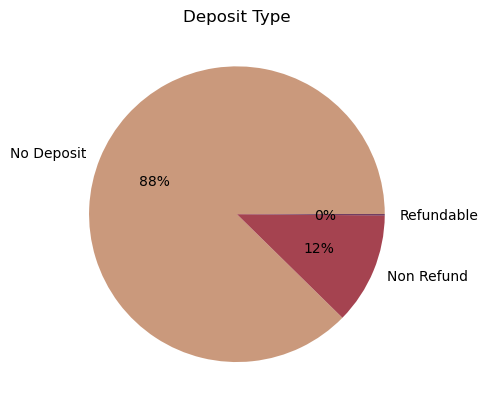

In [36]:
percentage_values = df['deposit_type'].value_counts() / len(df) * 100

plt.pie(percentage_values, labels = percentage_values.index, autopct = '%1.0f%%')
sns.set_palette("twilight_r")
plt.title('Deposit Type')
plt.show()

In [37]:
q1 = df[['is_canceled', 'deposit_type']]
q1.groupby('deposit_type')['is_canceled'].value_counts().unstack()

is_canceled,0,1
deposit_type,,
No Deposit,74947,29694
Non Refund,93,14494
Refundable,126,36


### Insights:
- 
- we can see that most of the people goes without depositing 
- almost nobody pays under the total cost of stay

### Does the type of payment affect the cancellation of the reservation?
#####  Yes, it does

## Does length of time between the entering date of the booking and the arrival date affect the cancellation?

In [165]:
# cdf = df.copy()

# month_to_num = {
#     'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
#     'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
# }
# cdf['arrival_date_month'] = cdf['arrival_date_month'].map(month_to_num)
# cdf['arrival_date_month'] = cdf['arrival_date_month'].astype(int)

In [166]:
# cdf['arrival_date'] = cdf['arrival_date_year'].astype(str) + '-' + cdf['arrival_date_month'].astype(str) + '-' + cdf['arrival_date_day_of_month'].astype(str)
# cdf['arrival_date'] = pd.to_datetime(cdf['arrival_date'])

In [167]:
# cdf['reservation_status_date'] = pd.to_datetime(cdf['reservation_status_date'])

In [168]:
# cdf['lead_time'] = (cdf['arrival_date'] - cdf['reservation_status_date']).dt.days

In [190]:
cancel_rate_by_lt = df.groupby('lead_time')['is_canceled'].mean().reset_index()
cancel_rate_by_lt['is_canceled'] *= 100

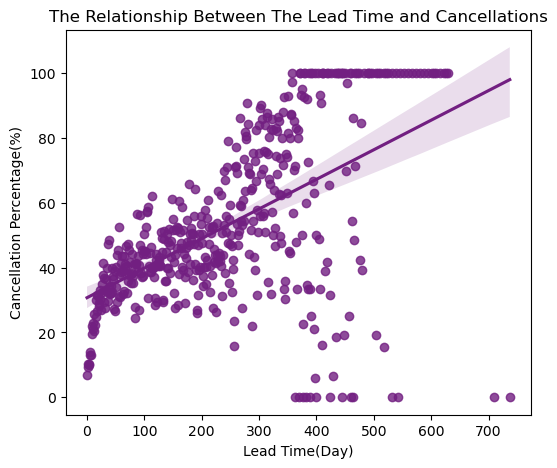

In [278]:
plt.figure(figsize = (6, 5))
sns.regplot(data = cancel_rate_by_lt, x = 'lead_time', y = 'is_canceled',
            color = sns.color_palette("magma", 2)[0]
           )
plt.xlabel('Lead Time(Day)')
plt.ylabel('Cancellation Percentage(%)')
plt.title('The Relationship Between The Lead Time and Cancellations')
plt.show()

### Insights:
- this gives us a postitve relation between them where low lead time has lower cancel percentage and some high lead time has 100%


#### Does length of time between the entering date of the booking and the arrival date affect the cancellation?
##### yes it does

## Which months that have lowest number of visitors?

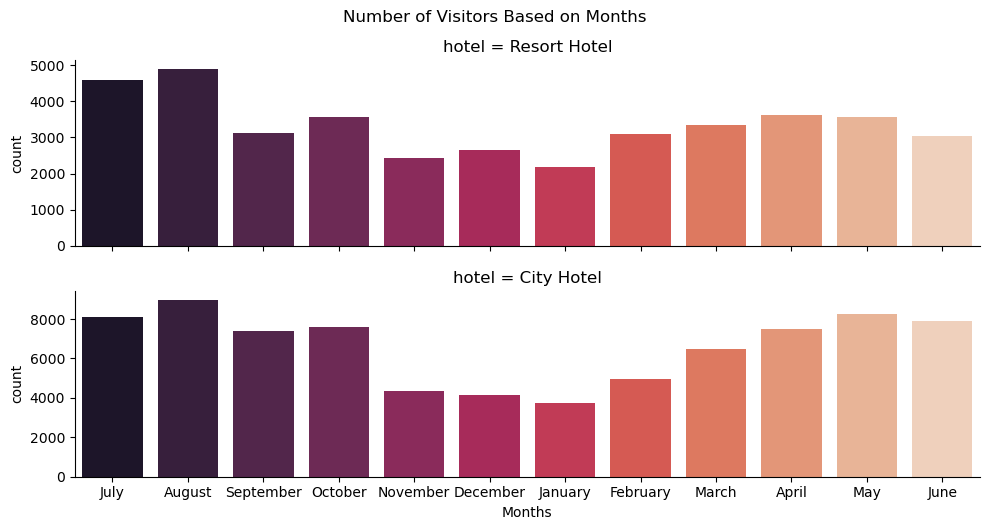

In [277]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
resort_plot = sns.countplot(data=df[df['hotel'] == 'Resort Hotel'], x='arrival_date_month', palette="rocket")
resort_plot.set_xticklabels([])
plt.title('hotel = Resort Hotel')
plt.xlabel('')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.subplot(2, 1, 2)
sns.countplot(data = df[df['hotel'] == 'City Hotel'], x = 'arrival_date_month', palette = "rocket")
plt.title('hotel = City Hotel')
plt.xlabel('Months')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.suptitle('Number of Visitors Based on Months', y = 1.05)
plt.show()

#### Which months that have lowest number of visitors?
##### January

# 

## Check if the lowest number of visitors due to the increase in the number of the canceled reservations?

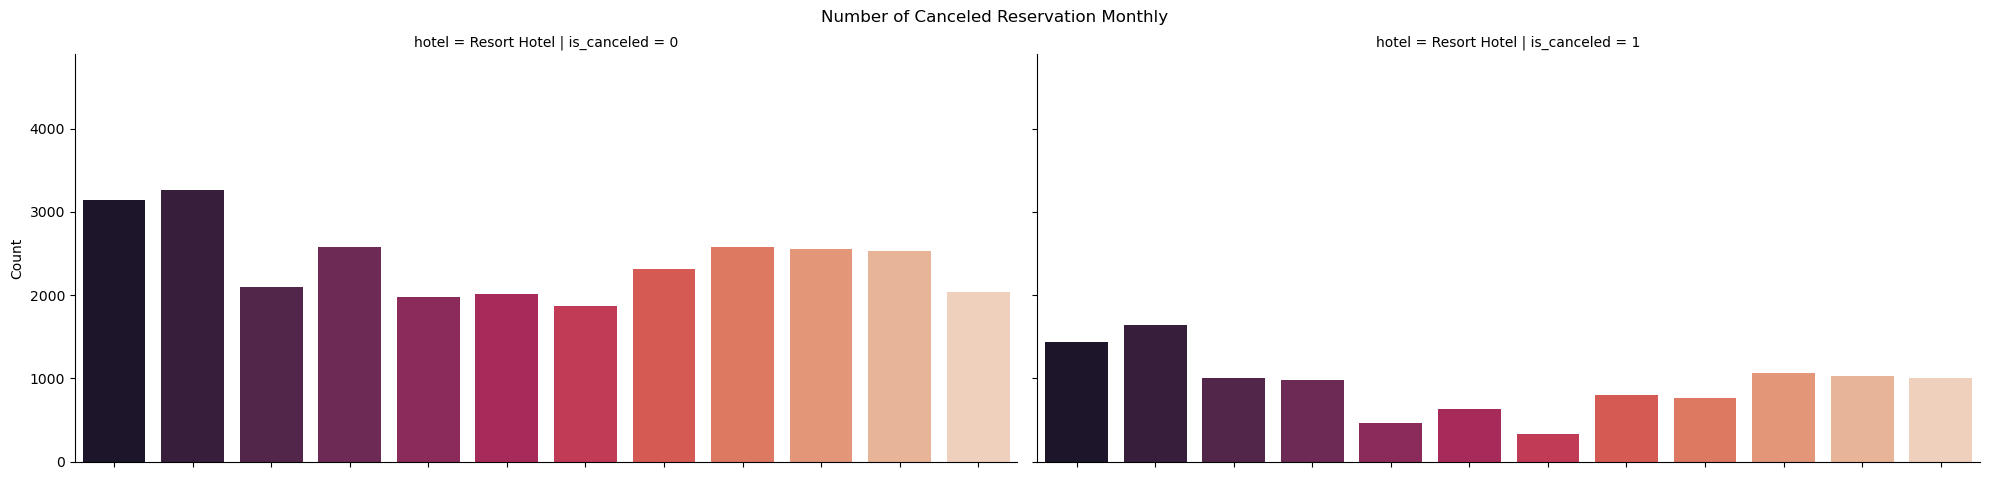

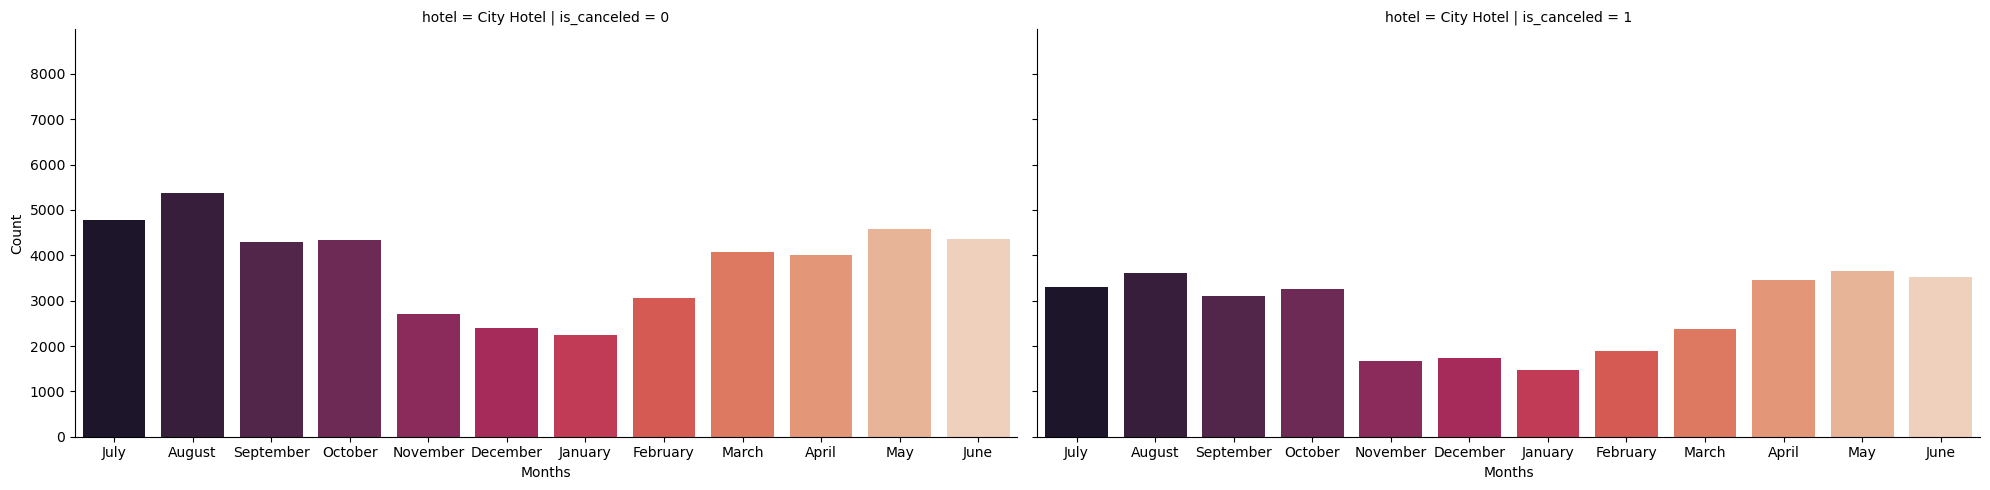

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

resort_data = df[df['hotel'] == 'Resort Hotel']
city_data = df[df['hotel'] == 'City Hotel']

g = sns.catplot(data=resort_data, x='arrival_date_month', col='is_canceled',
                kind='count', aspect=2, palette="rocket", height=5)
g.set_titles("hotel = Resort Hotel | is_canceled = {col_name}")

g.fig.suptitle('Number of Canceled Reservation Monthly', y=1.02)
g.set_xlabels('')

for ax in g.axes.flat:
    ax.set_xticklabels([])

g.set_ylabels('Count')
g.set(ylim=(0, max(resort_data['arrival_date_month'].value_counts())))

h = sns.catplot(data=city_data, x='arrival_date_month', col='is_canceled',
                kind='count', aspect=2, palette="rocket", height=5)
h.set_titles("hotel = City Hotel | is_canceled = {col_name}")

h.set_xlabels('Months')
h.set_ylabels('Count')
h.set(ylim=(0, max(city_data['arrival_date_month'].value_counts())))

plt.tight_layout()
plt.show()

### Insights:
-
- we can see clearly that there are a lot of cancelation when we splitted them

#### Check if the lowest number of visitors due to the increase in the number of the canceled reservations?
##### there is a cancelation every month and January has the lowes cancelation so no, it has nothing to do with the increase in the number of the canceled reservations

## Which top 10 countries that visitors come from?

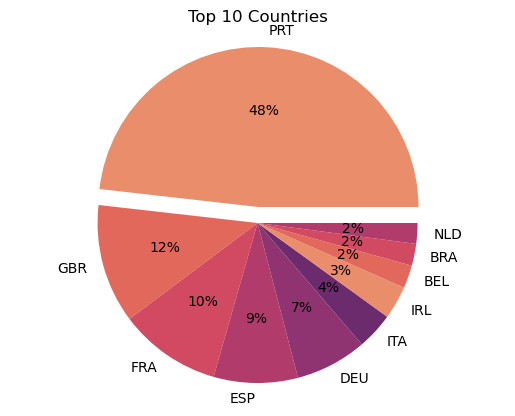

In [253]:
country_counts = df['country'].value_counts()
top_countries = country_counts.head(10)

plt.pie(top_countries, labels = top_countries.index, autopct = '%1.0f%%',
        explode = [0.1,0,0,0,0,0,0,0,0,0],
        colors = sns.color_palette('flare')
       )
plt.title('Top 10 Countries')
plt.axis('equal')

plt.show()


### Insights:
- 
- Portugal has the highest vistors count
- we can see that most of the visitors are from european countries

## Relation between booking changes and cancelling the reservation

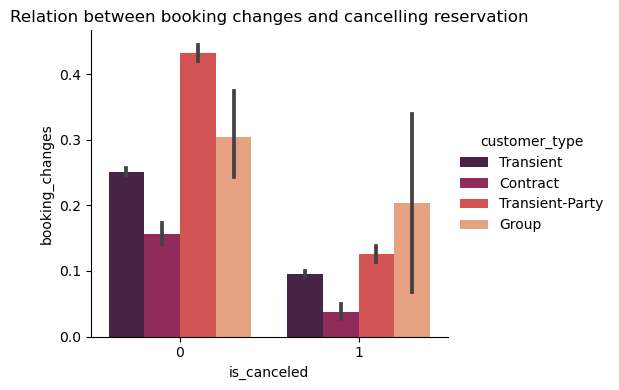

In [270]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(data = df, x = 'is_canceled', y = 'booking_changes', 
                 hue = 'customer_type', 
                 palette = 'rocket'
                )

plt.title('Relation between booking changes and cancelling reservation')
legend = plt.legend(title = 'customer_type', loc = 'center left', bbox_to_anchor = (1, 0.5))
legend.get_frame().set_edgecolor('none')
sns.despine()

plt.tight_layout()
plt.show()

### Insights:
-
- Most of the visitors prefer changing the bookings rathar than canceling the reservation
- Groups has high booking changes and cancellation rates

# Data Preprocessing

In [38]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [39]:
# Drop the columns with null values
df = df.drop(['agent' ,'company', 'country'], axis=1, errors="ignore")

In [40]:
df.dropna(subset = ["children"], inplace=True)

In [41]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [42]:
df = df.drop(['hotel','arrival_date_month','meal','customer_type',
              'market_segment', 'distribution_channel','assigned_room_type',
              'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status', 
              'reservation_status_date'], axis=1, errors="ignore")

In [43]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [44]:
X, y = df.drop(['is_canceled'],axis=1), df['is_canceled']

### Choose any machine learning algorithm to predict cancellation 
- use train-test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [47]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
rfc_pred = rfc.predict(X_test)

In [51]:
print(confusion_matrix(y_test,rfc_pred))

[[20730  1738]
 [ 3838  9510]]


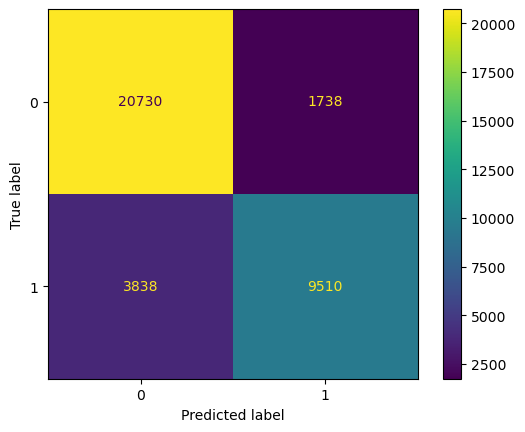

In [52]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

In [53]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     22468
           1       0.85      0.71      0.77     13348

    accuracy                           0.84     35816
   macro avg       0.84      0.82      0.83     35816
weighted avg       0.84      0.84      0.84     35816



In [56]:
print(accuracy_score(y_test ,rfc_pred))

0.8443153897699353


## Try to use the following techniques: PCA, pipelines, and Grid Search to enhance your model accuracy.

# PCA

In [57]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [58]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [59]:
pd.Series(pca.explained_variance_ratio_) 

0     0.112456
1     0.098923
2     0.084575
3     0.082897
4     0.067794
5     0.063264
6     0.060461
7     0.058300
8     0.055912
9     0.053408
10    0.051233
11    0.046691
12    0.044230
13    0.038013
14    0.033127
15    0.028977
16    0.019737
dtype: float64

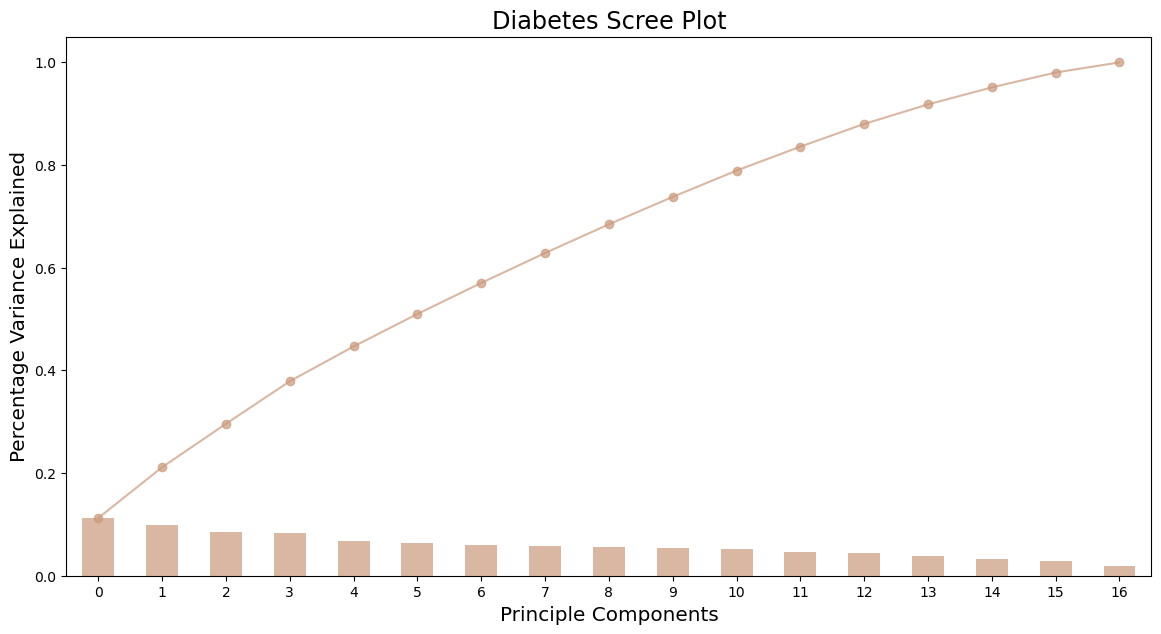

In [60]:
#plt.style.use("seaborn")
plt.figure(figsize = (14, 7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind = "bar", alpha = 0.7)

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total + x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [62]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test) # to avoid Data Leakage

In [76]:
pca = PCA(n_components = 8)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [77]:
logreg_noPCA = LogisticRegression(max_iter = 2085) # max_iter >> to allow the model reaches convergence
logreg = LogisticRegression()

In [78]:
%timeit logreg_noPCA.fit(X_train, y_train)

10.5 s ± 1.66 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
%timeit logreg.fit(X_train_pca, y_train)

73.1 ms ± 5.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [80]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.7160790270161606
Testing accuracy: 0.7133045197172245


# Pipeline

In [88]:
pipe = make_pipeline(StandardScaler(),
                     PCA(n_components = 8),
                     LogisticRegression())

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7133045197172245

In [89]:
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79     18756
           1       0.67      0.44      0.53     11091

    accuracy                           0.71     29847
   macro avg       0.70      0.66      0.66     29847
weighted avg       0.71      0.71      0.70     29847



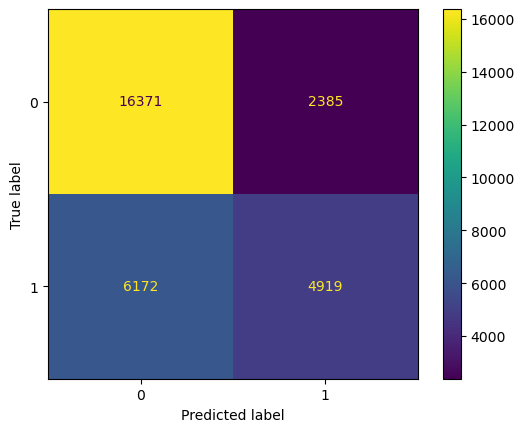

In [90]:
plot_confusion_matrix(pipe, X_test, y_test)
plt.grid(False);

In [91]:
pipe2 = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression())

In [92]:
param_grid = {
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "pca__n_components": [1,2,3,4,5,6,7,8,9,10],
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    "logisticregression__max_iter": [100, 500, 1000, 2000, 2500]
}

grid = GridSearchCV(
    pipe2, 
    param_grid = param_grid, 
    cv = 5, 
    verbose = 2,
    n_jobs = -1
)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__wit

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.3s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__wi

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.3s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=2, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.3s
[CV] END logisticregression__C=1, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=True, standardscaler__wi

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.5s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   1.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.5s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.5s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=9, standardscaler__with_mean=False, standardscaler_

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.5s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.5s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=False, s

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=100, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.5s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.3s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=500, pca__n_components=1, standardscaler__with_mean=False, stand

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.5s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.5s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.6s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standa

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.3s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=1, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.5s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=2, standardscaler__with_mean=False, s

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standard

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.6s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.6s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.8s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=100, pca__n_components=8, standardscaler__with_mean=True, standar

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   2.3s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=1, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.3s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=1, standardscaler__with_mean=False, s

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.6s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.5s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.7s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.7s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.8s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=500, pca__n_components=8, standardscaler__with_mean=False, stan

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.5s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.5s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.6s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standa

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=3, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=4, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.4s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=5, standardscaler__with_mean=False, stan

/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.4s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.5s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.3s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=100, pca__n_components=7, standardscaler__with_mean=False, standards

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1, 0.9, 0.8, 0.7, 0.6, 0.5,
                                                   0.4, 0.3, 0.2, 0.1],
                         'logisticregression__max_iter': [100, 500, 1000, 2000,
                                                          2500],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=2)

In [94]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.413677,0.021309,0.006198,0.001623,1,100,1,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.629942,0.630109,0.630054,0.630109,0.630033,0.630049,0.000062,1903
1,0.395279,0.036853,0.008566,0.002689,1,100,1,True,False,"{'logisticregression__C': 1, 'logisticregressi...",0.662106,0.663782,0.657192,0.663279,0.664545,0.662181,0.002617,1701
2,0.321325,0.009762,0.005079,0.001410,1,100,1,False,True,"{'logisticregression__C': 1, 'logisticregressi...",0.629942,0.630109,0.630054,0.630109,0.630033,0.630049,0.000062,1903
3,0.357152,0.006133,0.007746,0.004040,1,100,1,False,False,"{'logisticregression__C': 1, 'logisticregressi...",0.662106,0.663782,0.657192,0.663279,0.664545,0.662181,0.002617,1701
4,0.292156,0.026376,0.010607,0.006178,1,100,2,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.640161,0.642394,0.639937,0.643902,0.641202,0.641519,0.001476,1878


In [95]:
parameters = ['param_logisticregression__max_iter','param_pca__n_components',
              'param_standardscaler__with_mean','param_standardscaler__with_std',
              'mean_test_score','rank_test_score']
grid_df[parameters]

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
0,100,1,True,True,0.630049,1903
1,100,1,True,False,0.662181,1701
2,100,1,False,True,0.630049,1903
3,100,1,False,False,0.662181,1701
4,100,2,True,True,0.641519,1878
...,...,...,...,...,...,...
1995,2500,9,False,False,0.709948,590
1996,2500,10,True,True,0.719318,131
1997,2500,10,True,False,0.711355,478
1998,2500,10,False,True,0.719318,131


In [96]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1512,1000,9,True,True,0.719742,1
1274,500,9,False,True,0.719742,1
1312,1000,9,True,True,0.719742,1
1314,1000,9,False,True,0.719742,1
1352,2000,9,True,True,0.719742,1
...,...,...,...,...,...,...
1080,1000,1,True,True,0.630049,1903
42,500,1,False,True,0.630049,1903
1120,2000,1,True,True,0.630049,1903
0,100,1,True,True,0.630049,1903


In [97]:
grid_df['rank_test_score'].value_counts()

rank_test_score
1401    100
1701    100
1501    100
1601    100
1301    100
       ... 
1817      1
1845      1
1028      1
1022      1
483       1
Name: count, Length: 710, dtype: int64

In [98]:
best = grid_df[parameters].sort_values(by = ['rank_test_score']).head(20)
best

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1512,1000,9,True,True,0.719742,1
1274,500,9,False,True,0.719742,1
1312,1000,9,True,True,0.719742,1
1314,1000,9,False,True,0.719742,1
1352,2000,9,True,True,0.719742,1
1354,2000,9,False,True,0.719742,1
1394,2500,9,False,True,0.719742,1
1432,100,9,True,True,0.719742,1
1434,100,9,False,True,0.719742,1
1472,500,9,True,True,0.719742,1


In [99]:
grid.best_params_

{'logisticregression__C': 0.4,
 'logisticregression__max_iter': 100,
 'pca__n_components': 9,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

In [100]:
best.sort_values(by = ['param_pca__n_components'])

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1512,1000,9,True,True,0.719742,1
1234,100,9,False,True,0.719742,1
1272,500,9,True,True,0.719742,1
1594,2500,9,False,True,0.719742,1
1592,2500,9,True,True,0.719742,1
1554,2000,9,False,True,0.719742,1
1552,2000,9,True,True,0.719742,1
1514,1000,9,False,True,0.719742,1
1474,500,9,False,True,0.719742,1
1472,500,9,True,True,0.719742,1


In [101]:
best['param_pca__n_components'].value_counts()

param_pca__n_components
9    20
Name: count, dtype: int64

In [102]:
grid.best_score_

0.7197422773726099

In [103]:
pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79     18756
           1       0.67      0.46      0.55     11091

    accuracy                           0.72     29847
   macro avg       0.70      0.66      0.67     29847
weighted avg       0.71      0.72      0.70     29847



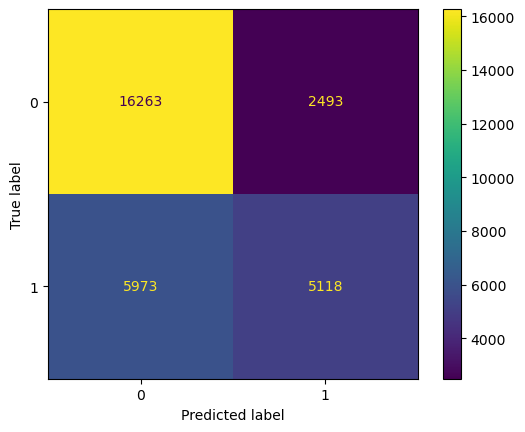

In [104]:
plot_confusion_matrix(grid, X_test, y_test)
plt.grid(False);